## Question1. When is the best time of day,day of week,and time of year to minimise delays? 


In [1]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#change to the direectory where the files are stored
os.chdir('C:\\Users\\juhyu\\OneDrive\\Desktop\\JH\\SIM\\Year2\\Programming for data science\\Coursework material\\dataverse_files')

In [3]:
# ====== create tables ======
#since the data is too big, we are extracting rows of odd number
airline2003=pd.read_csv('2003.csv.bz2', compression='bz2', low_memory=False,error_bad_lines=False,skiprows=lambda x: x%2 ==1)
airline2004=pd.read_csv('2004.csv.bz2', compression='bz2', low_memory=False,error_bad_lines=False,skiprows=lambda x: x%2 ==1)
airline2005=pd.read_csv('2005.csv.bz2', compression='bz2', low_memory=False,error_bad_lines=False,skiprows=lambda x: x%2 ==1)

C:\Users\juhyu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
frames=[airline2003,airline2004,airline2005]
df=pd.concat(frames)
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2003,1,30,4,1654.0,1655,1910.0,1913,UA,1017,...,2,26,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2003,1,1,3,1033.0,1035,1625.0,1634,UA,1018,...,6,11,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2003,1,3,5,1031.0,1035,1640.0,1634,UA,1018,...,13,13,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2003,1,5,7,1035.0,1035,1636.0,1634,UA,1018,...,5,9,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2003,1,1,3,1713.0,1710,1851.0,1847,UA,1020,...,7,29,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3570293,2005,12,22,4,758.0,759,1247.0,1241,DL,895,...,6,14,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3570294,2005,12,22,4,1256.0,1300,1306.0,1311,DL,897,...,6,22,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3570295,2005,12,22,4,1652.0,1655,1815.0,1837,DL,901,...,7,15,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3570296,2005,12,22,4,1507.0,1511,1641.0,1649,DL,903,...,4,29,0,NaN,0,0.0,0.0,0.0,0.0,0.0


In [5]:
#Getting the column names in dataframe
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

### 1) Best time of the day to minimise delays

In [6]:
#sorting out datas with cancelled=0, such that it will sort out the flights that were working
df=df[(df['Cancelled'] == 0)]

In [7]:
# function to convert concatenated hours and minutes into hh:mm format
def convert_to_time(x):
    try:
        if x != 0 or x != np.NAN:
            if str(int(x))[:-2].zfill(2) == '24':
                hour = '00'
            else:
                hour = str(int(x))[:-2].zfill(2)

        minutes = str(int(x))[-2:].zfill(2)
        time_format = f"{hour}:{minutes}"
        return time_format
    
    except Exception as e:
        pass

In [8]:
# Extract/Convert time
df['DepTime'] = df['DepTime'].dropna().apply(convert_to_time)
df['CRSDepTime'] = df['CRSDepTime'].dropna().apply(convert_to_time)

C:\Users\juhyu\AppData\Local\Temp/ipykernel_1776/610405953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DepTime'] = df['DepTime'].dropna().apply(convert_to_time)
C:\Users\juhyu\AppData\Local\Temp/ipykernel_1776/610405953.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CRSDepTime'] = df['CRSDepTime'].dropna().apply(convert_to_time)


In [9]:
df['DepTime'].isna().sum()
df['CRSDepTime'].isna().sum()

0

In [10]:
# Extract the hour
df['DepHour'] = df['DepTime'].astype(str).apply(lambda x: x[:2])

C:\Users\juhyu\AppData\Local\Temp/ipykernel_1776/731290861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DepHour'] = df['DepTime'].astype(str).apply(lambda x: x[:2])


In [11]:
df['DepHour'].unique()

array(['16', '10', '17', '18', '14', '13', '15', '19', '20', '21', '11',
       '06', '08', '07', '12', '09', '23', '00', '05', '22', '01', '02',
       '04', '03', '25', '27', '26', '28'], dtype=object)

In [12]:
type(df['DepHour'])

pandas.core.series.Series

In [13]:
df=df.loc[df['DepHour']<='24']

In [14]:
df[['DepTime','CRSDepTime','DepHour']]

,DepTime,CRSDepTime,DepHour
0,16:54,16:55,16
1,10:33,10:35,10
2,10:31,10:35,10
3,10:35,10:35,10
4,17:13,17:10,17
...,...,...,...
3570293,07:58,07:59,07
3570294,12:56,13:00,12
3570295,16:52,16:55,16
3570296,15:07,15:11,15


In [15]:
# Plot the distribution of delay over the day by hours, compared to Dephour.

Dep hour is divided into three timezones; morning:04AM-11AM,afternoon:12PM-19PM,night:20PM-03AM

In [16]:
timing = []
df['DepHour'].astype(int)

0          16
1          10
2          10
3          10
4          17
           ..
3570293     7
3570294    12
3570295    16
3570296    15
3570297    13
Name: DepHour, Length: 10197230, dtype: int32

In [17]:
for x in df['DepHour']:
    if int(x) < 12 and int(x) >= 4:
        timing.append("morning")
    elif int(x)>24:
        timing.append("morning")
    elif int(x) >= 12 and int(x) < 20:
        timing.append("afternoon")
    else:
        timing.append("night")
df['TIMING'] = timing

In [18]:
df['TIMING'].value_counts()

afternoon    5063474
morning      4032831
night        1100925
Name: TIMING, dtype: int64

In [19]:
df.groupby('TIMING')[['ArrDelay']].sum()

,ArrDelay
TIMING,
afternoon,37071034.0
morning,-118741.0
night,22244297.0


In [20]:
df2=df[['ArrDelay','TIMING']]

In [21]:
df.groupby('TIMING')[['ArrDelay']].mean()

,ArrDelay
TIMING,
afternoon,7.336491
morning,-0.029494
night,20.245868


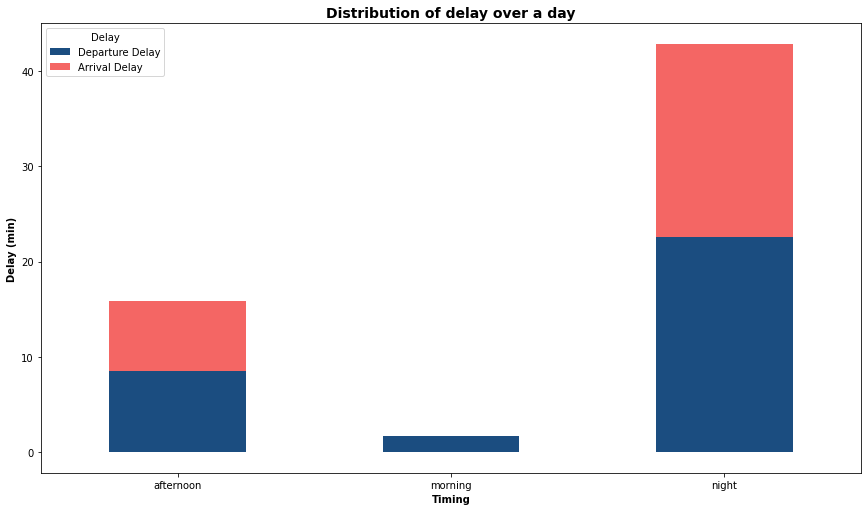

In [22]:
# Departure hour

colors = ['#1B4D80', '#F46664']

# plot 
barlist = df.groupby('TIMING')[['DepDelay','ArrDelay']].mean().plot.bar(
    figsize=[14.70, 8.27], color=colors,stacked=True)

# title, lables & legend
plt.title("Distribution of delay over a day", fontsize = 14, weight = "bold")
plt.ylabel('Delay (min)', fontsize = 10, weight = "bold")
plt.xlabel('Timing', fontsize = 10, weight = "bold")
plt.xticks(rotation=360)

plt.legend(['Departure Delay', 'Arrival Delay'], title="Delay")
plt.show()

##### Morning is the best timing to minimise delays for both departure and arrival delay.

### 2) Best day of week to minimise delays

In [23]:
df[['DepTime','CRSDepTime','ArrTime','CRSArrTime','DayOfWeek']]

,DepTime,CRSDepTime,ArrTime,CRSArrTime,DayOfWeek
0,16:54,16:55,1910.0,1913,4
1,10:33,10:35,1625.0,1634,3
2,10:31,10:35,1640.0,1634,5
3,10:35,10:35,1636.0,1634,7
4,17:13,17:10,1851.0,1847,3
...,...,...,...,...,...
3570293,07:58,07:59,1247.0,1241,4
3570294,12:56,13:00,1306.0,1311,4
3570295,16:52,16:55,1815.0,1837,4
3570296,15:07,15:11,1641.0,1649,4


In [24]:
#converting to list of days
days=list(df.DayOfWeek.unique())

#arranging days in ascending order
days.sort()
days

[1, 2, 3, 4, 5, 6, 7]

1=Monday,7=Sunday

In [25]:
df['DepDelay'] = df['DepDelay'].astype('float')

In [26]:
df['ArrDelay'] = df['ArrDelay'].astype('float')

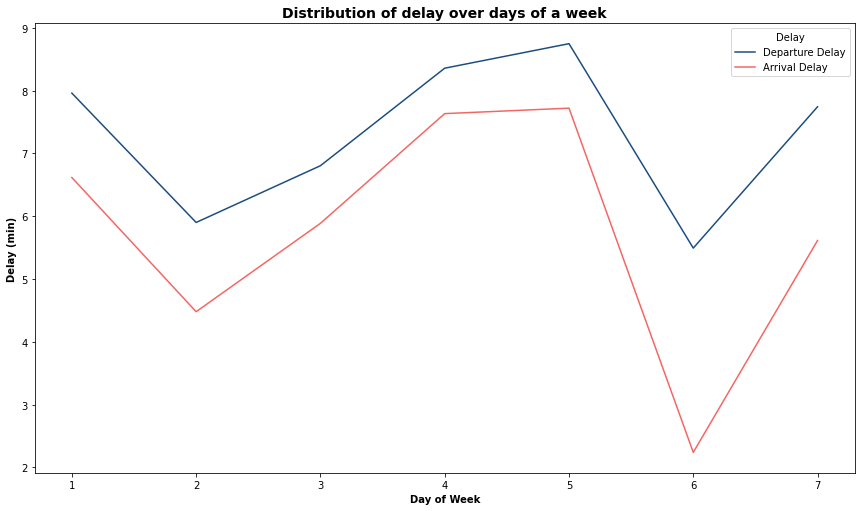

In [27]:
# plot
colors=['#1B4D80', '#F46664']

df.groupby('DayOfWeek')[['DepDelay','ArrDelay']].mean().plot.line(
    figsize=[14.70, 8.27], color=colors)
                                                                
# title, lables & legend
plt.title("Distribution of delay over days of a week", fontsize = 14, weight = "bold")
plt.ylabel('Delay (min)', fontsize = 10, weight = "bold")
plt.xlabel('Day of Week', fontsize = 10, weight = "bold")

plt.legend(['Departure Delay', 'Arrival Delay'], title="Delay")
plt.show()

##### Best day of week to minimise delays is Saturday for both departure and arrival delay. 

### 3) Best time of year to minimise delays

In [28]:
# We are going to create a column in dataframe that can divide the months into quarters of the year.

1st quarter(Q1): JAN,FEB,MAR
2nd quarter(Q2): APR,MAY,JUNE
3rd quarter(Q3): JULY,AUG,SEP
4th quarter(Q4): OCT,NOV,DEC

In [29]:
#checking the 
df['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [30]:
#Adding quarter column
quarter=[1,4,7,10,13]
labels=['Q1','Q2','Q3','Q4']
df['Quarter']=pd.cut(df['Month'],bins=quarter,labels=labels,right=False)

In [31]:
#extracting 20 samples to check if Quarter is well applied to the dataframe
df[['Month','Quarter','DepDelay','ArrDelay']].sample(20)

,Month,Quarter,DepDelay,ArrDelay
302390,2,Q1,4.0,-34.0
1353452,6,Q2,12.0,10.0
1887800,8,Q3,47.0,44.0
2328331,8,Q3,0.0,0.0
2245024,9,Q3,-2.0,-9.0
1275923,5,Q2,-5.0,-1.0
1728590,7,Q3,-5.0,-8.0
1418328,6,Q2,-9.0,-9.0
1310747,5,Q2,-4.0,-8.0
2228230,9,Q3,-8.0,1.0


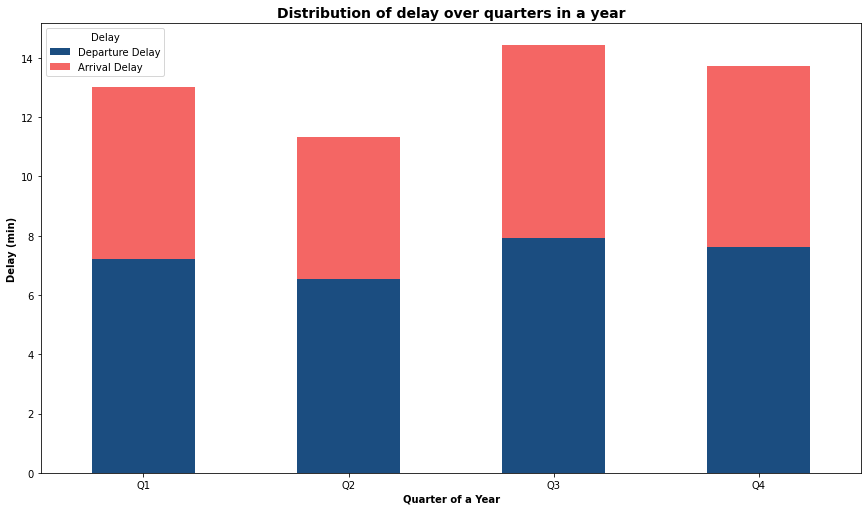

In [32]:
# plot
df.groupby('Quarter')[['DepDelay','ArrDelay']].mean().plot.bar(
    figsize=[14.70, 8.27], color=colors,stacked=True)
                                                                
# title, lables & legend
plt.title("Distribution of delay over quarters in a year", fontsize = 14, weight = "bold")
plt.ylabel('Delay (min)', fontsize = 10, weight = "bold")
plt.xlabel('Quarter of a Year', fontsize = 10, weight = "bold")
plt.xticks(rotation=360)

plt.legend(['Departure Delay', 'Arrival Delay'], title="Delay")
plt.show()

##### Second quarter of the year(Q2), which includes April,May and June, is the time of the year where both departure and arrival delays are the least. 